<a href="https://colab.research.google.com/github/ellerywuyn/DS5640/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [10]:
train = pd.read_csv("drive/MyDrive/zip.train", header = None, sep = " ")

In [9]:
test = pd.read_csv("drive/MyDrive/zip.test", header = None, sep = " ")

In [18]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

In [30]:
X_train = X_train.iloc[:, :-1]

In [24]:
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [53]:
def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

cnn_model = create_cnn()
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [54]:
n_samples_train = X_train.shape[0]
X_train_array = X_train.to_numpy()
X_train_reshaped = X_train_array.reshape(n_samples_train, 16, 16, 1)

In [55]:
n_samples_test = X_test.shape[0]
X_test_array = X_test.to_numpy()
X_test_reshaped = X_test_array.reshape(n_samples_test, 16, 16, 1)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


228/228 [==============================] - 6s 15ms/step - loss: 0.5760 - accuracy: 0.8292 - val_loss: 0.3422 - val_accuracy: 0.9033
Epoch 2/30
228/228 [==============================] - 3s 12ms/step - loss: 0.1403 - accuracy: 0.9609 - val_loss: 0.2288 - val_accuracy: 0.9357
Epoch 3/30
228/228 [==============================] - 3s 11ms/step - loss: 0.0880 - accuracy: 0.9739 - val_loss: 0.2015 - val_accuracy: 0.9472
Epoch 4/30
228/228 [==============================] - 3s 11ms/step - loss: 0.0593 - accuracy: 0.9838 - val_loss: 0.2192 - val_accuracy: 0.9452
Epoch 5/30
228/228 [==============================] - 4s 18ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.1964 - val_accuracy: 0.9482
Epoch 6/30
228/228 [==============================] - 3s 12ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.1845 - val_accuracy: 0.9576
Epoch 7/30
228/228 [==============================] - 3s 11ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.2096 - val_accuracy: 0.9522
Epoch 8/30

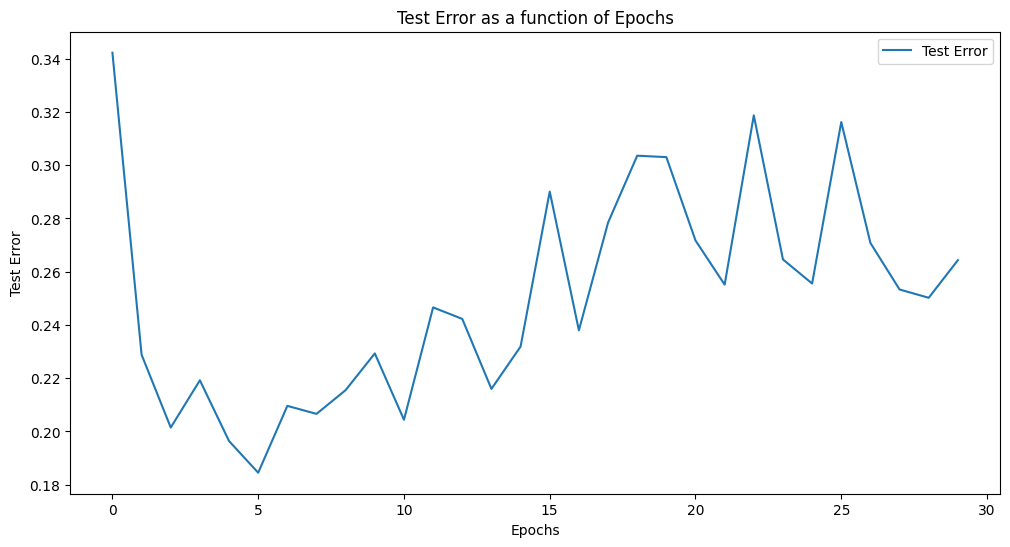

In [56]:
import matplotlib.pyplot as plt

model = cnn_model.fit(X_train_reshaped, y_train, epochs=30, validation_data=(X_test_reshaped, y_test))

# Plot the test error as a function of epochs
plt.figure(figsize=(12, 6))
plt.plot(model.history['val_loss'], label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Test Error')
plt.title('Test Error as a function of Epochs')
plt.legend()
plt.show()